# Time-Frequency Analysis

We will briefly overview basic signal processing concepts through examples of common sound sources in ocean acoustics. 

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## Sine Wave

Continuous wave is a signal with constant amplitude and frequency. A sine wave is one example:

$y(t) = A \sin(2 \pi f t + \mathcal{\phi)}$,

where:
* $A$ - peak of the deviation of the function from zero
* $f$ - the number of oscillations occurring within a second
* $\phi$ - where in the cycle the wave is at zero (in radians)


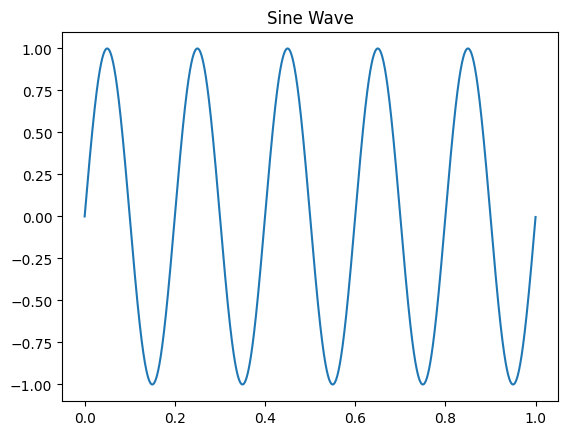

In [2]:
freq = 5
N = 10000
end_time = 1
time = np.linspace(0, end_time, end_time*N, endpoint=False) # 1 sec
A = 1
y = A*np.sin(2*np.pi*freq*time) # zero phase
plt.title("Sine Wave")
plt.plot(time, y)

In [4]:
import IPython.display as ipd

In [5]:
freq = 100
ipd.Audio(A*np.sin(2*np.pi*freq*time), rate=N)

In [6]:
from ipywidgets import interact
import ipywidgets as widgets

In [7]:
freq_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=1000,
    step=1,
    description='Frequency (Hz):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

In [8]:
def plot_sine_wave(A, freq, end_time):
    N = 1000
    time = np.linspace(0, end_time, N, endpoint=False) # 1 sec
    y = A*np.sin(2*np.pi*freq*time) # zero phase
    plt.title("Sine Wave")
    plt.plot(time, y)

In [ ]:
out = interact(plot_sine_wave, A=100, freq=5, end_time=1)
out = interact(plot_sine_wave, A=100, freq=5, end_time=1)

interactive(children=(IntSlider(value=100, description='A', max=300, min=-100), IntSlider(value=5, description…

In [ ]:
out = interact(plot_sine_wave, A=100, freq=5, end_time=1)
out = interact(plot_sine_wave, A=100, freq=5, end_time=1)

interactive(children=(IntSlider(value=100, description='A', max=300, min=-100), IntSlider(value=5, description…

Text(0, 0.5, 'Frequency (Hz)')

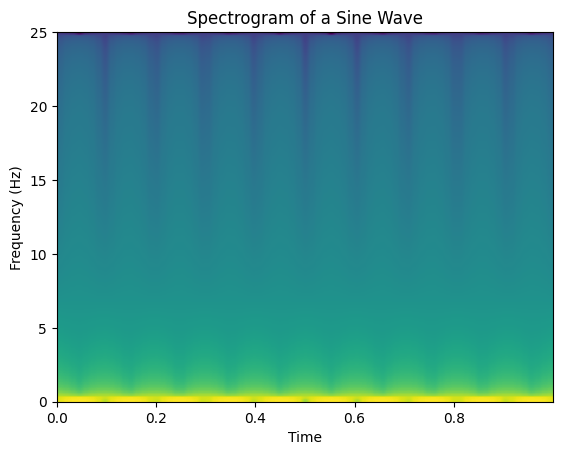

In [10]:
s, s_freq, s_t, im = plt.specgram(y, Fs = 50, xextent=[time[0],time[-1]])
plt.title("Spectrogram of a Sine Wave")
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")



Since the frequency is constant we observe a horizontal bar at 5Hz.

In [11]:
from scipy.signal import ShortTimeFFT

In [12]:
#SFT = ShortTimeFFT(w, hop=10, fs=1/T_x, mfft=200, scale_to='magnitude')
#SFT = ShortTimeFFT()
#Sx = SFT.stft(y)

In [13]:
# plt.pcolormesh(t, freq, s)

In [14]:
# F, t, Sxx = signal.spectrogram(y,freq)

In [15]:
#print(Sxx.shape)#

In [16]:
# plt.pcolormesh(t,F,Sxx)

## Chirp

Another example of a signal is a **chirp**, or a signal with an increasing or decreasing frequency.

We will generate example with linearly increasing frequency from 1Hz to 10Hz.

Text(0.5, 1.0, 'Upchirp')

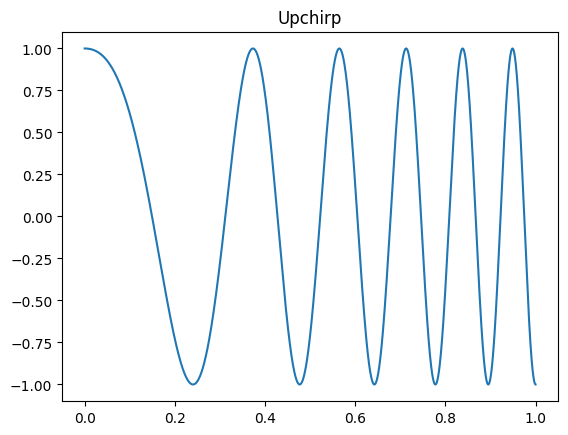

In [ ]:
import scipy as sp
y = sp.signal.chirp(time, f0=1, t1=1, f1=10)
plt.plot(time, y)
plt.title("Upchirp")

In [ ]:
freq = 100
ipd.Audio(sp.signal.chirp(time, f0=1, t1=1, f1=100), rate=N)

In [ ]:
def plot_chirp(f0, f1):
    N = 1000
    time = np.linspace(0, end_time, N, endpoint=False) # 1 sec
    y = sp.signal.chirp(time, f0=f0, t1=1, f1=f1) # zero phase, upchirp
    plt.title("Upchirp")
    plt.plot(time, y)

In [ ]:
out = interact(plot_chirp, f0=1, t1=1, f1=10)

interactive(children=(IntSlider(value=1, description='f0', max=3, min=-1), IntSlider(value=10, description='f1…

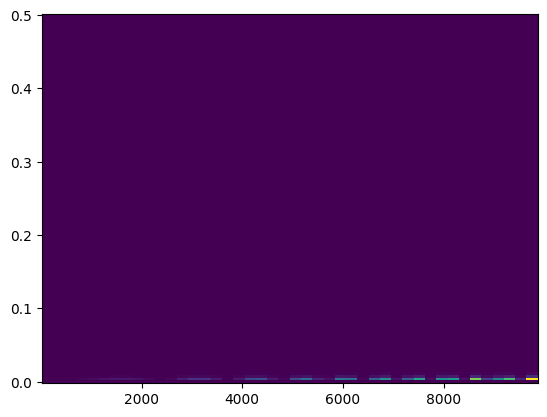

In [ ]:
F, t, Sxx = signal.spectrogram(y)
plt.pcolormesh(t,F,Sxx)

(array([[8.42949754e+01, 8.21833951e+01, 7.82467922e+01, ...,
         4.82079899e+01, 1.12079015e+00, 3.01463647e+01],
        [4.26998167e+01, 4.16490321e+01, 3.96773146e+01, ...,
         2.88204738e+01, 6.18692055e+00, 2.02603807e+01],
        [4.56725284e-04, 6.15207579e-04, 9.41290033e-04, ...,
         1.67210829e-01, 3.31692645e-01, 2.39214007e-01],
        ...,
        [3.57525139e-14, 3.47786047e-14, 3.30303611e-14, ...,
         1.15904812e-14, 6.50118281e-16, 7.28048378e-15],
        [8.93145056e-15, 8.68834741e-15, 8.25204796e-15, ...,
         2.98012496e-15, 3.71968436e-16, 1.94635401e-15],
        [3.54592293e-20, 1.63541416e-19, 4.53523169e-19, ...,
         5.69887540e-17, 1.41035905e-16, 8.59172827e-17]], shape=(129, 77)),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.14843

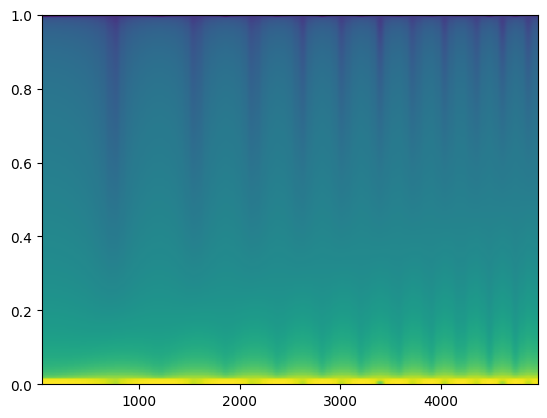

In [ ]:
plt.specgram(y)

## Impulse

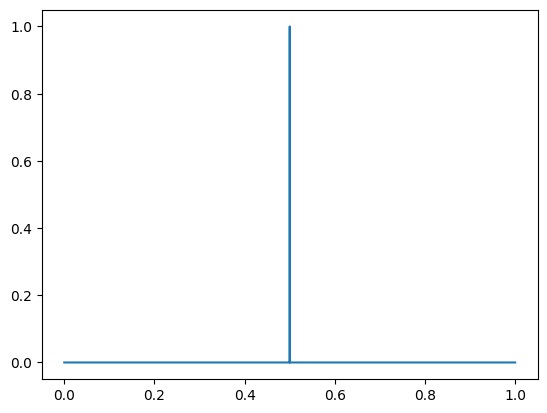

In [ ]:
y = sp.signal.unit_impulse(len(time), round(len(time)/2))
plt.plot(time, y,)

In [ ]:
ipd.Audio(sp.signal.unit_impulse(len(time), round(len(time)/2)), rate=N)

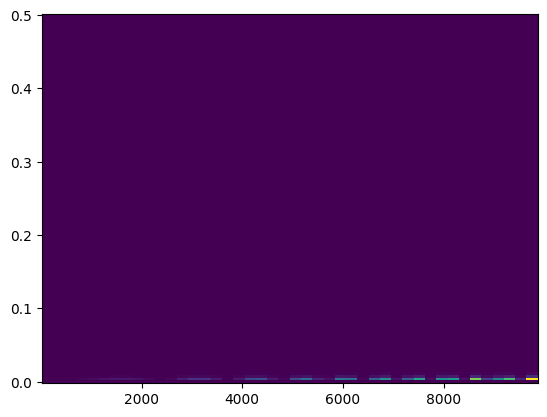

In [ ]:
F, t, Sxx = signal.spectrogram(y)
plt.pcolormesh(t,F,Sxx)

(array([[8.42949754e+01, 8.21833951e+01, 7.82467922e+01, ...,
         4.82079899e+01, 1.12079015e+00, 3.01463647e+01],
        [4.26998167e+01, 4.16490321e+01, 3.96773146e+01, ...,
         2.88204738e+01, 6.18692055e+00, 2.02603807e+01],
        [4.56725284e-04, 6.15207579e-04, 9.41290033e-04, ...,
         1.67210829e-01, 3.31692645e-01, 2.39214007e-01],
        ...,
        [3.57525139e-14, 3.47786047e-14, 3.30303611e-14, ...,
         1.15904812e-14, 6.50118281e-16, 7.28048378e-15],
        [8.93145056e-15, 8.68834741e-15, 8.25204796e-15, ...,
         2.98012496e-15, 3.71968436e-16, 1.94635401e-15],
        [3.54592293e-20, 1.63541416e-19, 4.53523169e-19, ...,
         5.69887540e-17, 1.41035905e-16, 8.59172827e-17]], shape=(129, 77)),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.14843

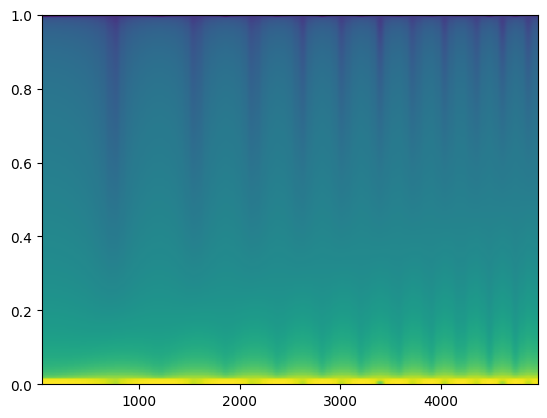

In [ ]:
plt.specgram(y)

(array([[8.42949754e+01, 8.21833951e+01, 7.82467922e+01, ...,
         4.82079899e+01, 1.12079015e+00, 3.01463647e+01],
        [4.26998167e+01, 4.16490321e+01, 3.96773146e+01, ...,
         2.88204738e+01, 6.18692055e+00, 2.02603807e+01],
        [4.56725284e-04, 6.15207579e-04, 9.41290033e-04, ...,
         1.67210829e-01, 3.31692645e-01, 2.39214007e-01],
        ...,
        [3.57525139e-14, 3.47786047e-14, 3.30303611e-14, ...,
         1.15904812e-14, 6.50118281e-16, 7.28048378e-15],
        [8.93145056e-15, 8.68834741e-15, 8.25204796e-15, ...,
         2.98012496e-15, 3.71968436e-16, 1.94635401e-15],
        [3.54592293e-20, 1.63541416e-19, 4.53523169e-19, ...,
         5.69887540e-17, 1.41035905e-16, 8.59172827e-17]], shape=(129, 77)),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.14843

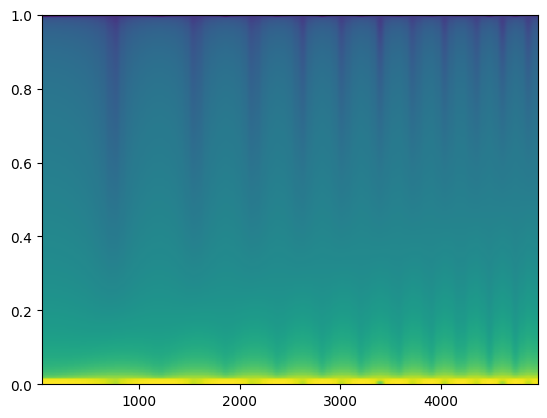

In [ ]:
plt.specgram(y)